In [588]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#mpl.rcParams.update(mpl.rcParamsDefault)

In [589]:
# Загрузка данных из файла
data = pd.read_csv("/content/na-isal-june-2023-quarter-consolidated-accounts.csv")

In [590]:
# Выведем первые 10 строк
# Наш фрейм данных называется data, поэтому мы вызываем data.head(10) и
# печатаем результат

print(data.head(5))

        Series_reference   period  value        Status    Units  Magnitude  \
0  SNEQ.SG03AB01GE00S900  2016.06  65453  Experimental  Dollars          6   
1  SNEQ.SG03AB01GE00S900  2016.09  64466  Experimental  Dollars          6   
2  SNEQ.SG03AB01GE00S900  2016.12  71185  Experimental  Dollars          6   
3  SNEQ.SG03AB01GE00S900  2017.03  70247  Experimental  Dollars          6   
4  SNEQ.SG03AB01GE00S900  2017.06  69649  Experimental  Dollars          6   

  seasonality                        SNA_Account Transaction  \
0           A  Consolidated accounts - table 1.1       B01GE   
1           A  Consolidated accounts - table 1.1       B01GE   
2           A  Consolidated accounts - table 1.1       B01GE   
3           A  Consolidated accounts - table 1.1       B01GE   
4           A  Consolidated accounts - table 1.1       B01GE   

                              Transaction_Label Asset_type Asset_type_label  \
0  Gross domestic product - expenditure measure        NaN         

In [591]:
columnsName = {
    'Series_reference':'Ссылка на серию',
    'period':'Период',
    'value': 'Значение',
    'Status': 'Статус',
    'Units': 'Единицы',
    'Magnitude': 'Величина',
    'seasonality': 'Сезонность',
    'SNA_Account': 'Счёт SNA',
    'Transaction': 'Транзакция',
    'Transaction_Label': 'Метка транзакции',
    'Asset_type': 'Тип актива',
    'Asset_type_label': 'Метка типа актива',
    'Sector': 'Сектор',
    'Sector_name': 'Название сектора',
    'Subject': 'Субъект',
    'year': 'Год',
    'month': 'Месяц'
}

data.rename(columns = columnsName, inplace = True )

In [592]:
# Получение информации о столбцах

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ссылка на серию    2581 non-null   object 
 1   Период             2581 non-null   float64
 2   Значение           2581 non-null   int64  
 3   Статус             2581 non-null   object 
 4   Единицы            2581 non-null   object 
 5   Величина           2581 non-null   int64  
 6   Сезонность         2581 non-null   object 
 7   Счёт SNA           2581 non-null   object 
 8   Транзакция         2581 non-null   object 
 9   Метка транзакции   2581 non-null   object 
 10  Тип актива         116 non-null    object 
 11  Метка типа актива  116 non-null    object 
 12  Сектор             696 non-null    float64
 13  Название сектора   696 non-null    object 
 14  Субъект            2581 non-null   object 
 15  Год                2581 non-null   int64  
 16  Месяц              2581 

In [593]:
data.isnull().sum()

Ссылка на серию         0
Период                  0
Значение                0
Статус                  0
Единицы                 0
Величина                0
Сезонность              0
Счёт SNA                0
Транзакция              0
Метка транзакции        0
Тип актива           2465
Метка типа актива    2465
Сектор               1885
Название сектора     1885
Субъект                 0
Год                     0
Месяц                   0
dtype: int64

In [594]:
data.isnull().sum()

Ссылка на серию         0
Период                  0
Значение                0
Статус                  0
Единицы                 0
Величина                0
Сезонность              0
Счёт SNA                0
Транзакция              0
Метка транзакции        0
Тип актива           2465
Метка типа актива    2465
Сектор               1885
Название сектора     1885
Субъект                 0
Год                     0
Месяц                   0
dtype: int64

In [595]:
for col in data.columns:
  print(f'{col}: {data[col].isna().sum() / data.shape[0] * 100:.2f}%')

Ссылка на серию: 0.00%
Период: 0.00%
Значение: 0.00%
Статус: 0.00%
Единицы: 0.00%
Величина: 0.00%
Сезонность: 0.00%
Счёт SNA: 0.00%
Транзакция: 0.00%
Метка транзакции: 0.00%
Тип актива: 95.51%
Метка типа актива: 95.51%
Сектор: 73.03%
Название сектора: 73.03%
Субъект: 0.00%
Год: 0.00%
Месяц: 0.00%


<Axes: >

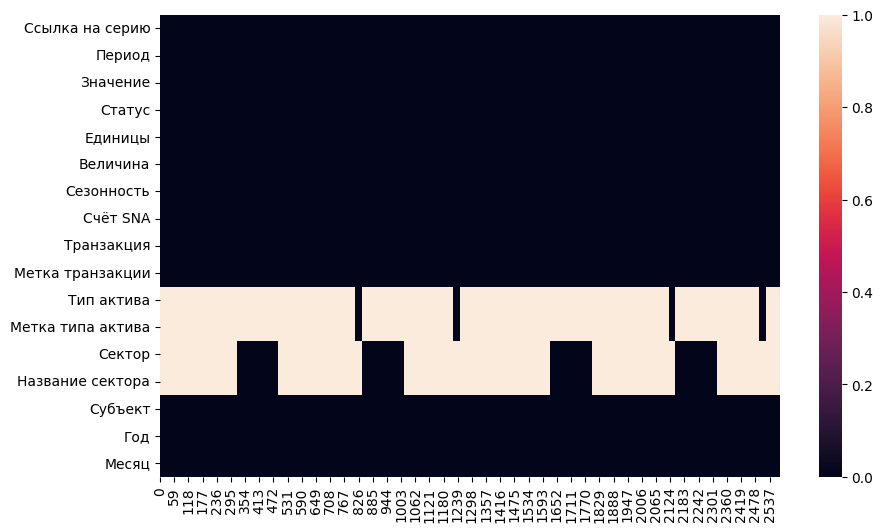

In [596]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna().transpose())

In [597]:
print(data["Тип актива"].unique())
print(data["Метка типа актива"].unique())

[nan 'AN1']
[nan 'Produced non-financial assets']


In [598]:
data.drop('Тип актива', axis=1 , inplace=True)
data.drop('Метка типа актива', axis=1, inplace=True)

<Axes: >

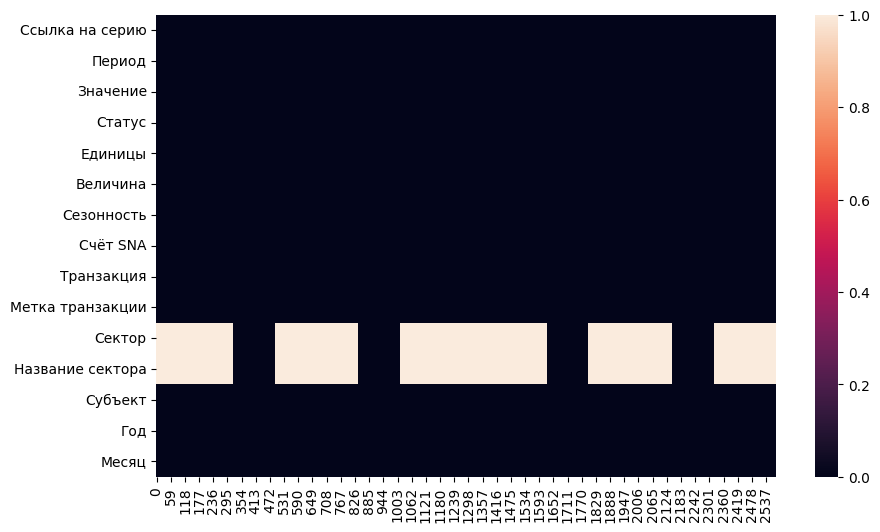

In [599]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna().transpose())

In [600]:
print(data["Сектор"].unique(), data["Сектор"].median())
print(data["Название сектора"].unique())

[nan 31. 32.  4.  5.  6.] 6.0
[nan 'Central government institutions' 'Local government institutions'
 'Non-profit institutions serving households' 'Households' 'Rest of world']


In [601]:
print(data["Метка транзакции"].unique())

['Gross domestic product - expenditure measure'
 'Gross domestic product - income measure'
 'Gross operating surplus and gross mixed income'
 'Gross national expenditure' 'Balance on external goods and services'
 'Statistical discrepancy' 'Compensation of employees'
 'Taxes on production and imports' 'Subsidies'
 'Gross fixed capital formation' 'Change in inventories'
 'Final consumption expenditure' 'Exports of goods and services'
 'Imports of goods and services' 'Gross natioal income'
 'Gross national disposable income' 'National disposable income'
 'use of national disposable income' 'Saving'
 'Consumption of fixed capital'
 'Investment income from the rest of the world, net'
 'Current transfers from the rest of the world, net'
 'Net lending to the rest of the world' 'Finance of capital accumulation'
 'Capital accumulation'
 'Capital transfers from the rest of the world, net'
 'Purchase of non-produced non-financial assets from the rest of the world, net'
 'Consumption of fixed catp

<Axes: ylabel='Frequency'>

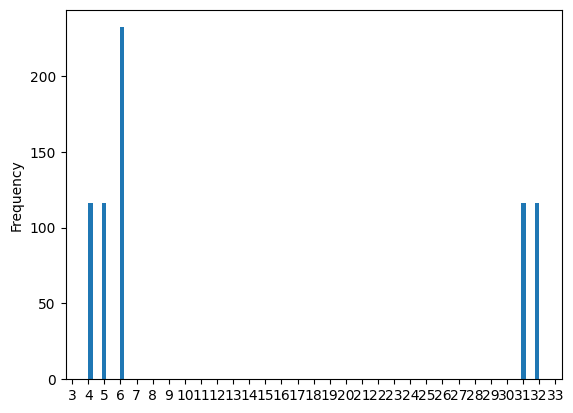

In [602]:
plt.xticks(range(0, 35, 1))
data["Сектор"].plot(kind='hist', bins=100)

In [603]:
data["Сектор"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2576   NaN
2577   NaN
2578   NaN
2579   NaN
2580   NaN
Name: Сектор, Length: 2581, dtype: float64

In [604]:
data.describe(include = "all")

,Ссылка на серию,Период,Значение,Статус,Единицы,Величина,Сезонность,Счёт SNA,Транзакция,Метка транзакции,Сектор,Название сектора,Субъект,Год,Месяц
count,2581,2581.000000,2581.000000,2581,2581,2581.0,2581,2581,2581,2581,696.000000,696,2581,2581.000000,2581.000000
unique,89,NaN,NaN,1,1,NaN,2,3,28,28,NaN,5,1,NaN,NaN
top,SNEQ.SG03AB01GE00S900,NaN,NaN,Experimental,Dollars,NaN,A,Consolidated accounts - table 1.2,P03,Final consumption expenditure,NaN,Rest of world,National Accounts - SNA 2008 - SNE,NaN,NaN
freq,29,NaN,NaN,2581,2581,NaN,1305,1044,522,522,NaN,232,2581,NaN,NaN
mean,NaN,2019.453793,23372.225107,NaN,NaN,6.0,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,2019.379310,7.448276
std,NaN,2.118646,28270.571918,NaN,NaN,0.0,NaN,NaN,NaN,NaN,12.405151,NaN,NaN,2.124393,3.307751
min,NaN,2016.060000,-11139.000000,NaN,NaN,6.0,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,2016.000000,3.000000
25%,NaN,2018.030000,795.000000,NaN,NaN,6.0,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,2018.000000,6.000000
50%,NaN,2019.120000,12263.000000,NaN,NaN,6.0,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,2019.000000,6.000000
75%,NaN,2021.090000,38760.000000,NaN,NaN,6.0,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,2021.000000,9.000000


In [605]:
data.groupby("Название сектора")["Значение"].sum()

Название сектора
Central government institutions               1649036
Households                                    5352064
Local government institutions                  206702
Non-profit institutions serving households      97304
Rest of world                                 2319311
Name: Значение, dtype: int64

In [606]:
data["Сектор"].median()

6.0

In [607]:
data.drop('Сектор', axis=1 , inplace=True)
data.drop('Название сектора', axis=1, inplace=True)

In [608]:
data.isnull().sum()

Ссылка на серию     0
Период              0
Значение            0
Статус              0
Единицы             0
Величина            0
Сезонность          0
Счёт SNA            0
Транзакция          0
Метка транзакции    0
Субъект             0
Год                 0
Месяц               0
dtype: int64

In [609]:
data.describe(include = ['O'])

,Ссылка на серию,Статус,Единицы,Сезонность,Счёт SNA,Транзакция,Метка транзакции,Субъект
count,2581,2581,2581,2581,2581,2581,2581,2581
unique,89,1,1,2,3,28,28,1
top,SNEQ.SG03AB01GE00S900,Experimental,Dollars,A,Consolidated accounts - table 1.2,P03,Final consumption expenditure,National Accounts - SNA 2008 - SNE
freq,29,2581,2581,1305,1044,522,522,2581


In [610]:
data.describe()

,Период,Значение,Величина,Год,Месяц
count,2581.000000,2581.000000,2581.0,2581.000000,2581.000000
mean,2019.453793,23372.225107,6.0,2019.379310,7.448276
std,2.118646,28270.571918,0.0,2.124393,3.307751
min,2016.060000,-11139.000000,6.0,2016.000000,3.000000
25%,2018.030000,795.000000,6.0,2018.000000,6.000000
50%,2019.120000,12263.000000,6.0,2019.000000,6.000000
75%,2021.090000,38760.000000,6.0,2021.000000,9.000000
max,2023.060000,108739.000000,6.0,2023.000000,12.000000


In [611]:
data.describe(include=["O"])

,Ссылка на серию,Статус,Единицы,Сезонность,Счёт SNA,Транзакция,Метка транзакции,Субъект
count,2581,2581,2581,2581,2581,2581,2581,2581
unique,89,1,1,2,3,28,28,1
top,SNEQ.SG03AB01GE00S900,Experimental,Dollars,A,Consolidated accounts - table 1.2,P03,Final consumption expenditure,National Accounts - SNA 2008 - SNE
freq,29,2581,2581,1305,1044,522,522,2581


In [612]:
data["Статус"]

0       Experimental
1       Experimental
2       Experimental
3       Experimental
4       Experimental
            ...     
2576    Experimental
2577    Experimental
2578    Experimental
2579    Experimental
2580    Experimental
Name: Статус, Length: 2581, dtype: object

In [613]:
data['Величина'].unique()

array([6])

In [614]:
# Подсчёт количества уникальных элементов в столбцах
nunique = data.nunique()

# Определение индексов столбцов, которые имеют только 1 уникальный элемент
cols_to_drop = nunique[nunique == 1].index

# Удаление столбцов, в которых все значения одинаковые
data = data.drop(cols_to_drop, axis=1)

In [615]:
data

,Ссылка на серию,Период,Значение,Сезонность,Счёт SNA,Транзакция,Метка транзакции,Год,Месяц
0,SNEQ.SG03AB01GE00S900,2016.06,65453,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,6
1,SNEQ.SG03AB01GE00S900,2016.09,64466,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,9
2,SNEQ.SG03AB01GE00S900,2016.12,71185,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,12
3,SNEQ.SG03AB01GE00S900,2017.03,70247,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2017,3
4,SNEQ.SG03AB01GE00S900,2017.06,69649,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2017,6
...,...,...,...,...,...,...,...,...,...
2576,SNEQ.SG05SP052000S900,2022.06,1264,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,6
2577,SNEQ.SG05SP052000S900,2022.09,-159,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,9
2578,SNEQ.SG05SP052000S900,2022.12,731,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,12
2579,SNEQ.SG05SP052000S900,2023.03,-593,S,Consolidated accounts - table 1.3,P052,Change in inventories,2023,3


In [616]:
import scipy.stats as stats

In [617]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ссылка на серию   2581 non-null   object 
 1   Период            2581 non-null   float64
 2   Значение          2581 non-null   int64  
 3   Сезонность        2581 non-null   object 
 4   Счёт SNA          2581 non-null   object 
 5   Транзакция        2581 non-null   object 
 6   Метка транзакции  2581 non-null   object 
 7   Год               2581 non-null   int64  
 8   Месяц             2581 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 181.6+ KB


In [629]:
# Фильтр Хэмпеля
def hampel(vals_orig, x):
    # Копирование набора данных
    vals = vals_orig.copy()

    # Вычисление абсолютной разницы между медианными значениями и фактическими
    difference = np.abs(vals[x].median() - vals[x])

    # Формирование медианного абсолютного отклонения
    median_abs_deviation = difference.median()

    # Определение условия "больше 3-х медианных абсолютных отклонения"
    threshold = 3 * median_abs_deviation

    # Формирование условия для индексации в наборе данных
    outlier_idx = difference > threshold

    # Заполнение всех удовлетворяющих условию значений на nan
    vals[x][outlier_idx] = np.nan

    return(vals)

# Применение фильтра Хэмпеля
copy = hampel(data, "Значение")

# Замена всех значений nan в наборе данных на умноженное на 2 среднее значение
copy["Значение"] = copy["Значение"].fillna(8 * copy["Значение"].mean())

<ipython-input-629-b93ab2168de0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vals[x][outlier_idx] = np.nan


<Axes: >

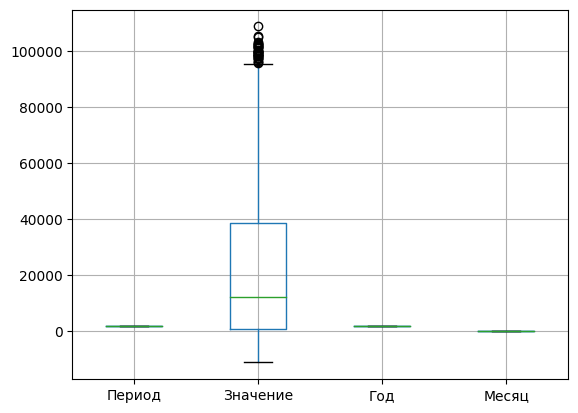

In [630]:
numeric_col = ['Период', 'Значение', 'Год', 'Месяц']
data.boxplot(numeric_col)

<Axes: >

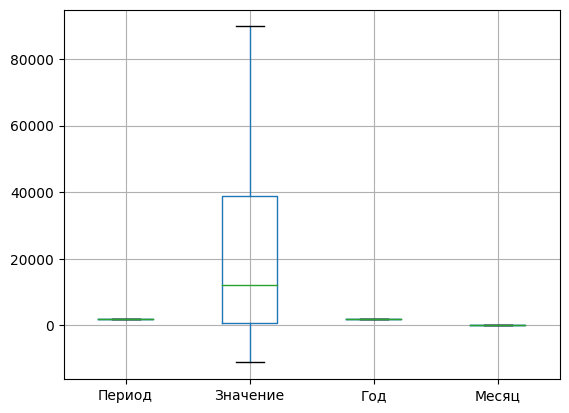

In [631]:
numeric_col = ['Период', 'Значение', 'Год', 'Месяц']
copy.boxplot(numeric_col)

In [632]:
data["Значение"] = copy["Значение"]

<Axes: >

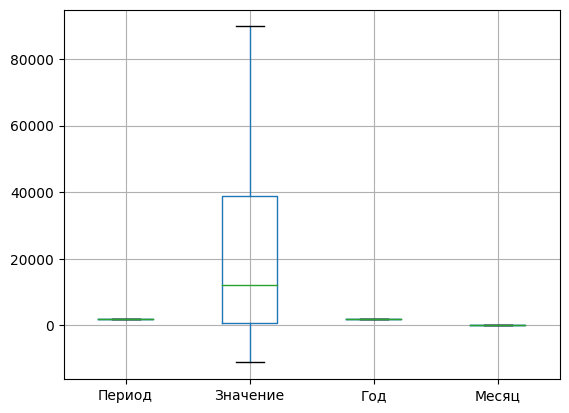

In [633]:
numeric_col = ['Период', 'Значение', 'Год', 'Месяц']
data.boxplot(numeric_col)

In [637]:
data

,Ссылка на серию,Период,Значение,Сезонность,Счёт SNA,Транзакция,Метка транзакции,Год,Месяц
0,SNEQ.SG03AB01GE00S900,2016.06,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,6
1,SNEQ.SG03AB01GE00S900,2016.09,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,9
2,SNEQ.SG03AB01GE00S900,2016.12,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,12
3,SNEQ.SG03AB01GE00S900,2017.03,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2017,3
4,SNEQ.SG03AB01GE00S900,2017.06,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2017,6
...,...,...,...,...,...,...,...,...,...
2576,SNEQ.SG05SP052000S900,2022.06,1264.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,6
2577,SNEQ.SG05SP052000S900,2022.09,-159.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,9
2578,SNEQ.SG05SP052000S900,2022.12,731.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,12
2579,SNEQ.SG05SP052000S900,2023.03,-593.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2023,3


<ipython-input-650-bbbd371852d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Сезонность', data=data, palette='colorblind')


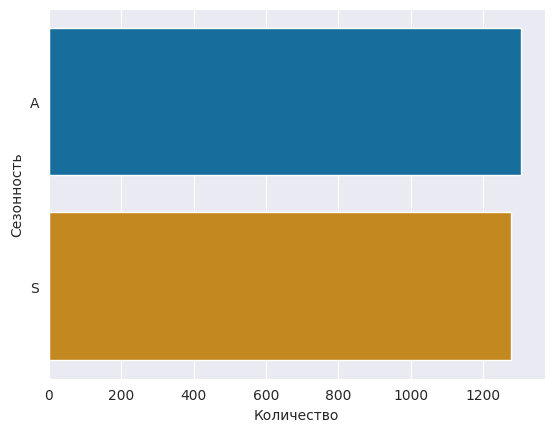

In [650]:
sns.set_style('darkgrid')
sns.countplot(y='Сезонность', data=data, palette='colorblind')
plt.xlabel('Количество')
plt.ylabel('Сезонность')
plt.show()

In [653]:
A = len(data[data['Сезонность'] == 'A'])
S = len(data[data['Сезонность'] == 'S'])

print("Всего A: ", A, '\nВсего S: ', S)

Всего A:  1305 
Всего S:  1276


<ipython-input-659-9114daa369da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Год', data=data, palette='colorblind')


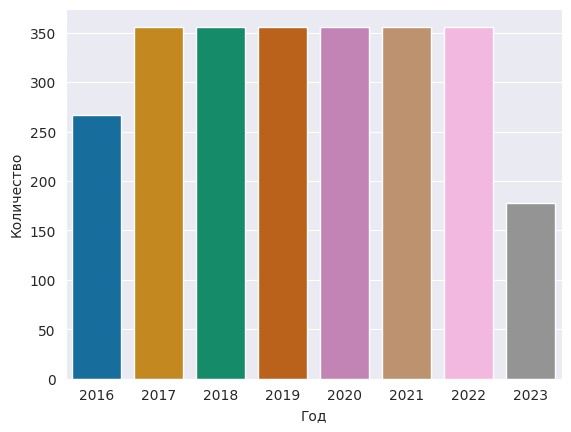

In [659]:
sns.set_style('darkgrid')
sns.countplot(x='Год', data=data, palette='colorblind')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

In [663]:
A = len(data[data['Год'] == 2016])
B = len(data[data['Год'] == 2017])
C = len(data[data['Год'] == 2018])

print(A)
print(B)
print(C)

267
356
356


<ipython-input-665-1400486458d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Счёт SNA', data=data, palette='colorblind')


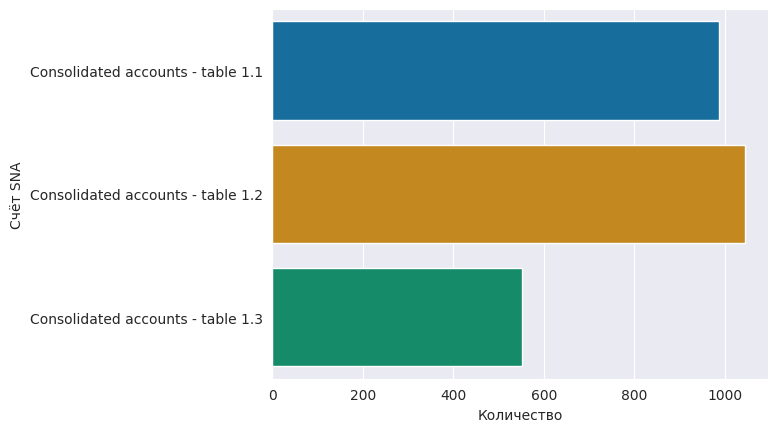

In [665]:
sns.set_style('darkgrid')
sns.countplot(y='Счёт SNA', data=data, palette='colorblind')
plt.xlabel('Количество')
plt.ylabel('Счёт SNA')
plt.show()

<ipython-input-666-b4b685876035>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Транзакция', data=data, palette='colorblind')


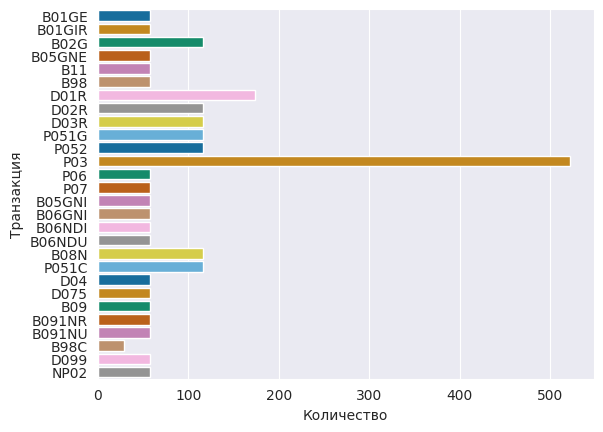

In [666]:
sns.set_style('darkgrid')
sns.countplot(y='Транзакция', data=data, palette='colorblind')
plt.xlabel('Количество')
plt.ylabel('Транзакция')
plt.show()

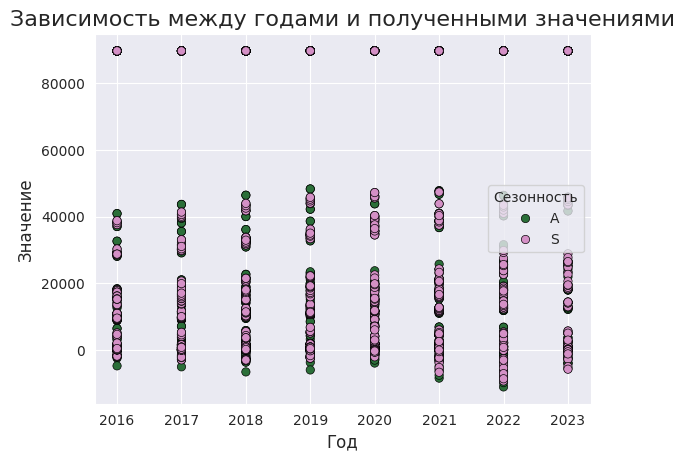

In [690]:
sns.set_style('darkgrid')
plt.title('Зависимость между годами и полученными значениями', size=16)
plt.xlabel('Год', size=12)
plt.ylabel('Значение', size=12)

sns.scatterplot(x='Год', y='Значение', data=data,
                hue='Сезонность', hue_order=['A', 'S'], edgecolor='black', palette='cubehelix')
plt.show()

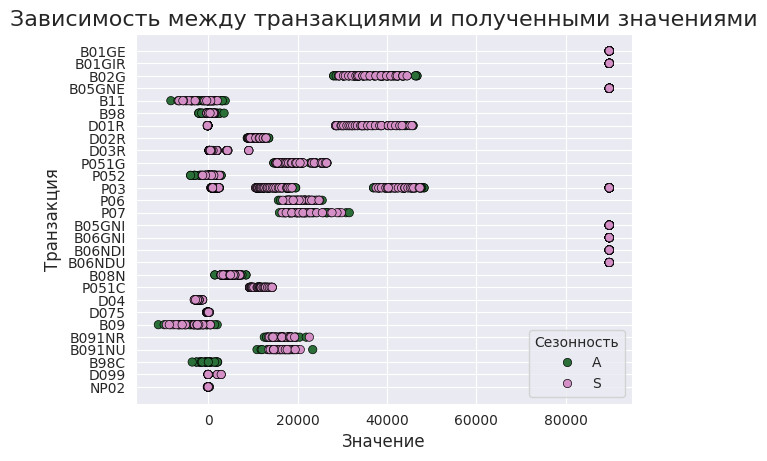

In [708]:
sns.set_style('darkgrid')
plt.title('Зависимость между транзакциями и полученными значениями', size=16)
plt.xlabel('Значение', size=12)
plt.ylabel('Транзакция', size=12)

sns.scatterplot(x='Значение', y='Транзакция', data=data,
                hue='Сезонность', hue_order=['A', 'S'], edgecolor='black', palette='cubehelix')
plt.show()

In [683]:
data

,Ссылка на серию,Период,Значение,Сезонность,Счёт SNA,Транзакция,Метка транзакции,Год,Месяц
0,SNEQ.SG03AB01GE00S900,2016.06,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,6
1,SNEQ.SG03AB01GE00S900,2016.09,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,9
2,SNEQ.SG03AB01GE00S900,2016.12,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,12
3,SNEQ.SG03AB01GE00S900,2017.03,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2017,3
4,SNEQ.SG03AB01GE00S900,2017.06,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2017,6
...,...,...,...,...,...,...,...,...,...
2576,SNEQ.SG05SP052000S900,2022.06,1264.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,6
2577,SNEQ.SG05SP052000S900,2022.09,-159.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,9
2578,SNEQ.SG05SP052000S900,2022.12,731.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,12
2579,SNEQ.SG05SP052000S900,2023.03,-593.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2023,3


In [686]:
data['Период'] = data['Период'].astype(np.int64)

In [687]:
data

,Ссылка на серию,Период,Значение,Сезонность,Счёт SNA,Транзакция,Метка транзакции,Год,Месяц
0,SNEQ.SG03AB01GE00S900,2016,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,6
1,SNEQ.SG03AB01GE00S900,2016,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,9
2,SNEQ.SG03AB01GE00S900,2016,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2016,12
3,SNEQ.SG03AB01GE00S900,2017,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2017,3
4,SNEQ.SG03AB01GE00S900,2017,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2017,6
...,...,...,...,...,...,...,...,...,...
2576,SNEQ.SG05SP052000S900,2022,1264.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,6
2577,SNEQ.SG05SP052000S900,2022,-159.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,9
2578,SNEQ.SG05SP052000S900,2022,731.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2022,12
2579,SNEQ.SG05SP052000S900,2023,-593.000000,S,Consolidated accounts - table 1.3,P052,Change in inventories,2023,3


In [709]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
  std = data[data["Год"] == year]["Значение"].std()

  print("Year: ", year, " - ", "Std: ", std)



Year:  2016  -  Std:  32534.133940200332
Year:  2017  -  Std:  32549.60549700627
Year:  2018  -  Std:  32596.629241580536
Year:  2019  -  Std:  32546.77741720197
Year:  2020  -  Std:  32788.70399867583
Year:  2021  -  Std:  34168.52952360936
Year:  2022  -  Std:  35168.87575874862
Year:  2023  -  Std:  35099.99022470776


In [711]:
transactions = data["Транзакция"].unique()

for transaction in transactions:
  std = data[data["Транзакция"] == transaction]["Значение"].std()

  print("Transaction: ", transaction, " - ", "Std: ", std)

Transaction:  B01GE  -  Std:  0.0
Transaction:  B01GIR  -  Std:  0.0
Transaction:  B02G  -  Std:  4876.648883950057
Transaction:  B05GNE  -  Std:  0.0
Transaction:  B11  -  Std:  2821.195721150111
Transaction:  B98  -  Std:  1139.380576588047
Transaction:  D01R  -  Std:  17340.15015416089
Transaction:  D02R  -  Std:  1253.2540347280828
Transaction:  D03R  -  Std:  1936.656106375837
Transaction:  P051G  -  Std:  3514.7965020289103
Transaction:  P052  -  Std:  1307.007537410774
Transaction:  P03  -  Std:  32891.90581728476
Transaction:  P06  -  Std:  2391.9456812108588
Transaction:  P07  -  Std:  3904.2008086192222
Transaction:  B05GNI  -  Std:  0.0
Transaction:  B06GNI  -  Std:  0.0
Transaction:  B06NDI  -  Std:  0.0
Transaction:  B06NDU  -  Std:  0.0
Transaction:  B08N  -  Std:  1363.4607405438917
Transaction:  P051C  -  Std:  1422.0103399400975
Transaction:  D04  -  Std:  509.60886155220527
Transaction:  D075  -  Std:  136.65968878354363
Transaction:  B09  -  Std:  3022.134588742581
T

<ipython-input-726-9037fa2db7ee>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=kde_data,shade=True, palette='colorblind')


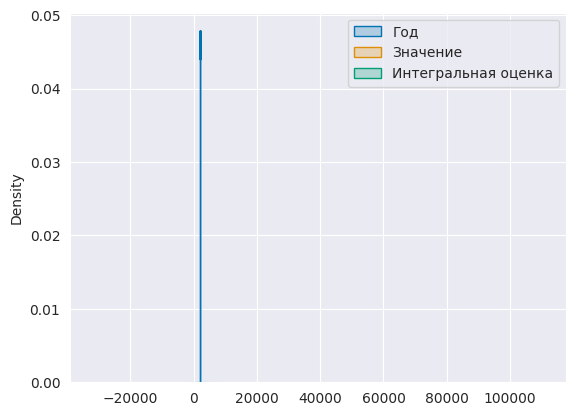

In [726]:
total_marks = ((data['Год'] + data['Значение'])/200)*100
data['Интегральная оценка'] = total_marks
kde_data = data[ ['Год','Значение','Интегральная оценка'] ]
sns.set_style("darkgrid")
sns.kdeplot(data=kde_data,shade=True, palette='colorblind')
plt.show()


In [731]:
data[data["Интегральная оценка"] == data["Интегральная оценка"].max()]

,Ссылка на серию,Период,Значение,Сезонность,Счёт SNA,Транзакция,Метка транзакции,Год,Месяц,Интегральная оценка
27,SNEQ.SG03AB01GE00S900,2023,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2023,3,45891.313551
28,SNEQ.SG03AB01GE00S900,2023,89759.627102,A,Consolidated accounts - table 1.1,B01GE,Gross domestic product - expenditure measure,2023,6,45891.313551
56,SNEQ.SG03AB01GI00S900,2023,89759.627102,A,Consolidated accounts - table 1.1,B01GIR,Gross domestic product - income measure,2023,3,45891.313551
57,SNEQ.SG03AB01GI00S900,2023,89759.627102,A,Consolidated accounts - table 1.1,B01GIR,Gross domestic product - income measure,2023,6,45891.313551
114,SNEQ.SG03AB05GNE0S900,2023,89759.627102,A,Consolidated accounts - table 1.1,B05GNE,Gross national expenditure,2023,3,45891.313551
115,SNEQ.SG03AB05GNE0S900,2023,89759.627102,A,Consolidated accounts - table 1.1,B05GNE,Gross national expenditure,2023,6,45891.313551
433,SNEQ.SG03AP030000S500,2023,89759.627102,A,Consolidated accounts - table 1.1,P03,Final consumption expenditure,2023,3,45891.313551
434,SNEQ.SG03AP030000S500,2023,89759.627102,A,Consolidated accounts - table 1.1,P03,Final consumption expenditure,2023,6,45891.313551
549,SNEQ.SG04AB05GNI0S900,2023,89759.627102,A,Consolidated accounts - table 1.2,B05GNI,Gross natioal income,2023,3,45891.313551
550,SNEQ.SG04AB05GNI0S900,2023,89759.627102,A,Consolidated accounts - table 1.2,B05GNI,Gross natioal income,2023,6,45891.313551
